Machine learning programming assignment by Dr. Roni Khardon Sir

**Task 1**
please make sure to import all data in the wd and extracting the files too before running


In [ ]:
#all libraries required for 3 tasks
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#importing files, pls import to working directory
with open('training_data.txt', 'r') as f:
  train_data = f.read().split()
with open('test_data.txt', 'r') as f:
  test_data = f.read().split()

In [ ]:
#vocab create
vocab = list(set(train_data + test_data))
K = len(vocab)
print(K)
word_to_index = {}
index = 0
for word in vocab:
  word_to_index[word] = index
  index += 1


9999


In [ ]:
#train sizes to iterate on later and dirichlet alphas
N = 640000
train_sizes = [N//128, N//64, N//16, N//4, N]
alpha_prime = 2
alpha = np.full(K, alpha_prime)

In [ ]:
def count_words(data, word_to_index):
  counts = np.zeros(len(word_to_index))
  for word in data:
    if word in word_to_index:
      counts[word_to_index[word]] += 1
  return counts

In [ ]:
#formula for perplecity along with the log infinty edge case
def calculate_perplexity(data, model_probs, word_to_index):
  N = len(data)
  log_likelihood = 0
  for word in data:
    if word in word_to_index:
      prob = model_probs[word_to_index[word]]
      if prob > 0:
        log_likelihood += np.log(prob)
      else:
        log_likelihood += float('-inf')
  return np.exp(-log_likelihood / N)

In [ ]:
def train_models(train_subset, alpha_prime, K):
  N = len(train_subset)
  word_counts = count_words(train_subset, word_to_index)

  #methods
  ml_estimate = word_counts / N
  map_estimate = (word_counts + alpha_prime - 1) / (N + alpha_prime * K - K)
  pred_distribution = (word_counts + alpha_prime) / (N + alpha_prime * K)

  return ml_estimate, map_estimate, pred_distribution

In [ ]:
# training sizes and alpha'
N = len(train_data)
train_sizes = [N//128, N//64, N//16, N//4, N]
alpha_prime = 2

results = []

In [ ]:
for size in train_sizes:
  train_subset = train_data[:size]

  # model training with iter
  ml_model, map_model, pred_model = train_models(train_subset, alpha_prime, K)

  #calculating perplexities
  result = {
    'size': size,
    'ml_train': calculate_perplexity(train_subset, ml_model, word_to_index),
    'ml_test': calculate_perplexity(test_data, ml_model, word_to_index),
    'map_train': calculate_perplexity(train_subset, map_model, word_to_index),
    'map_test': calculate_perplexity(test_data, map_model, word_to_index),
    'pred_train': calculate_perplexity(train_subset, pred_model, word_to_index),
    'pred_test': calculate_perplexity(test_data, pred_model, word_to_index)
  }
  results.append(result)
  print(result)

{'size': 5000, 'ml_train': 3337.6905243972765, 'ml_test': inf, 'map_train': 5850.778971151943, 'map_test': 10106.87617288602, 'pred_train': 6953.9271187232, 'pred_test': 9812.377969466646}
{'size': 10000, 'ml_train': 5010.339877613582, 'ml_test': inf, 'map_train': 6452.848785059833, 'map_test': 10004.357699410373, 'pred_train': 7226.359473656668, 'pred_test': 9677.335643949886}
{'size': 40000, 'ml_train': 7462.089806839892, 'ml_test': inf, 'map_train': 7653.887928365619, 'map_test': 9338.596327693833, 'pred_train': 7851.680181986443, 'pred_test': 9191.114889275786}
{'size': 160000, 'ml_train': 8276.399199722386, 'ml_test': inf, 'map_train': 8286.92339377225, 'map_test': 8800.537803098856, 'pred_train': 8308.036952804405, 'pred_test': 8779.915214573752}
{'size': 640000, 'ml_train': 8476.454149008498, 'ml_test': 8612.346410622104, 'map_train': 8477.001545621864, 'map_test': 8609.536150969845, 'pred_train': 8478.501171717808, 'pred_test': 8607.971360465888}


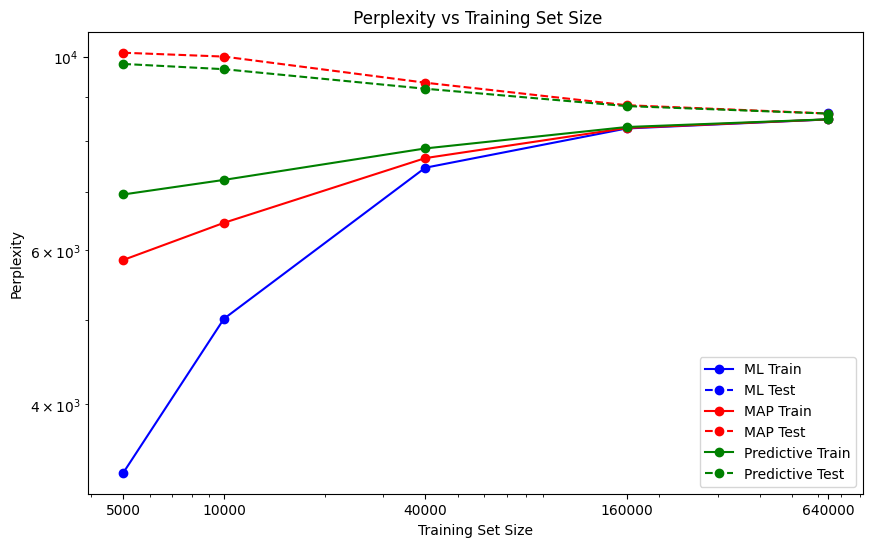

In [ ]:
sizes = [r['size'] for r in results]
plt.figure(figsize=(10, 6))
plt.plot(sizes, [r['ml_train'] for r in results], 'b-o', label='ML Train')
plt.plot(sizes, [r['ml_test'] for r in results], 'b--o', label='ML Test')
plt.plot(sizes, [r['map_train'] for r in results], 'r-o', label='MAP Train')
plt.plot(sizes, [r['map_test'] for r in results], 'r--o', label='MAP Test')
plt.plot(sizes, [r['pred_train'] for r in results], 'g-o', label='Predictive Train')
plt.plot(sizes, [r['pred_test'] for r in results], 'g--o', label='Predictive Test')
plt.xscale('log')
plt.yscale('log')
plt.xticks(sizes, labels=[str(size) for size in sizes])
plt.xlabel('Training Set Size')
plt.ylabel('Perplexity')
plt.title(' Perplexity vs Training Set Size')
plt.legend()
plt.show()

Task 2

In [ ]:
#for the formula we need a log gamma function
def log_gamma(x):
  if x <= 0:
    return float('-inf')
  result = 0
  for i in range(1, int(x)):
    result += np.log(i)
  return result

In [ ]:
# evidence function using the gamma function
def calculate_log_evidence(alpha_prime, word_counts, N, K):
  alpha_vector = alpha_prime * np.ones(K)
  alpha_0 = np.sum(alpha_vector)
  log_evidence = (log_gamma(alpha_0)+ np.sum([log_gamma(alpha_vector[i] + word_counts[i]) for i in range(K)])- log_gamma(alpha_0 + N)- np.sum([log_gamma(alpha_vector[i]) for i in range(K)]))

  return log_evidence

alpha 1 evidence -46065 perplexity 10106
alpha 2 evidence -45984 perplexity 9812
alpha 3 evidence -45979 perplexity 9781
alpha 4 evidence -45985 perplexity 9790
alpha 5 evidence -45991 perplexity 9806
alpha 6 evidence -45997 perplexity 9822
alpha 7 evidence -46002 perplexity 9837
alpha 8 evidence -46006 perplexity 9850
alpha 9 evidence -46010 perplexity 9861
alpha 10 evidence -46013 perplexity 9871


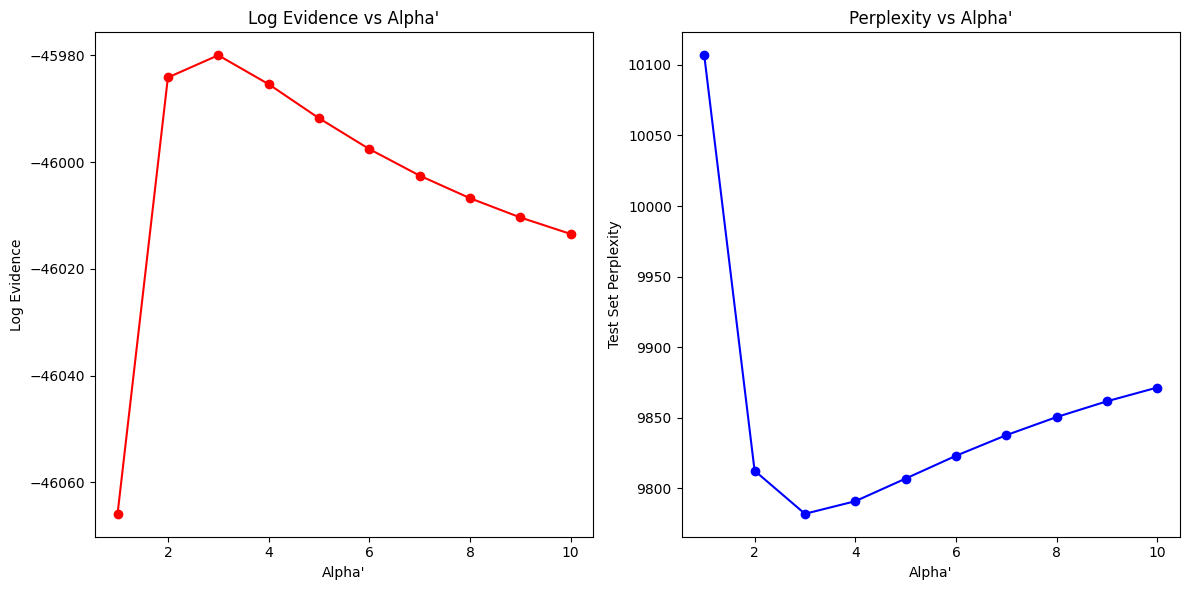

In [ ]:
#iterating through alpha and comparison building
def iter_alpha(train_data, test_data, word_to_index, K):
  N = len(train_data)
  word_counts = count_words(train_data, word_to_index)

  results = {'alphas': [], 'log_evidences': [], 'perplexities': []}

  for alpha_prime in range(1, 11):  # Using a for loop instead of np.arange
    results['alphas'].append(alpha_prime)

    # Evidence
    log_evidence = calculate_log_evidence(alpha_prime, word_counts, N, K)
    results['log_evidences'].append(log_evidence)

    # Perplex
    pred_distribution = (word_counts + alpha_prime) / (N + alpha_prime * K)
    perplexity = calculate_perplexity(test_data, pred_distribution, word_to_index)
    results['perplexities'].append(perplexity)
    print("alpha",alpha_prime,"evidence",int(log_evidence),'perplexity',int(perplexity))
  return results

# Plot results
results = iter_alpha(train_data[:len(train_data)//128], test_data, word_to_index, K)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(results['alphas'], results['log_evidences'], 'r-o')
plt.xlabel("Alpha'")
plt.ylabel("Log Evidence")
plt.title("Log Evidence vs Alpha'")

plt.subplot(1, 2, 2)
plt.plot(results['alphas'], results['perplexities'], 'b-o')
plt.xlabel("Alpha'")
plt.ylabel("Test Set Perplexity")
plt.title("Perplexity vs Alpha'")

plt.tight_layout()
plt.show()

Task 3

In [ ]:
#importing new files
with open('pg345.txt.clean', 'r') as f:
    train_data = f.read().split()
with open('pg1188.txt.clean', 'r') as f:
    test_data_1 = f.read().split()
with open('pg84.txt.clean', 'r') as f:
    test_data_2 = f.read().split()

In [ ]:
#new vocab create
vocab = list(set(train_data + test_data_1 + test_data_2))
K = len(vocab)
print(K)
word_to_index = {}
index = 0
for word in vocab:
  word_to_index[word] = index
  index += 1
len(word_to_index)

16411


16411

In [ ]:
#model train
def train_pred_model(train_data, alpha_prime, K):
    N = len(train_data)
    word_counts = count_words(train_data, word_to_index)
    pred_distribution = (word_counts + alpha_prime) / (N + alpha_prime * K)
    return pred_distribution

In [ ]:
alpha_prime = 2
N = len(train_data)
word_counts = count_words(train_data, word_to_index)
pred_model = train_pred_model(train_data, alpha_prime, K)

pred_distribution = (word_counts + alpha_prime) / (N + alpha_prime * K)

In [ ]:
perplexity_test_1 = calculate_perplexity(test_data_1, pred_model, word_to_index)
perplexity_test_2 = calculate_perplexity(test_data_2, pred_model, word_to_index)

print("perplexity for pg1188:",int(perplexity_test_1))
print("perplexity for pg84:",int(perplexity_test_2))

perplexity for pg1188: 5864
perplexity for pg84: 8270
